In [475]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [476]:
DATA_PATH = './workspace/data/titanic/'
df = pd.read_csv(DATA_PATH + 'train.csv')

In [477]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [478]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [479]:
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [480]:
df.isnull().sum().sum()

866

In [481]:
(df.isnull().sum() / df.shape[0]).round(4).sort_values(ascending=False)

Cabin          0.7710
Age            0.1987
Embarked       0.0022
PassengerId    0.0000
Survived       0.0000
Pclass         0.0000
Name           0.0000
Sex            0.0000
SibSp          0.0000
Parch          0.0000
Ticket         0.0000
Fare           0.0000
dtype: float64

In [482]:
df.skew().sort_values(ascending=False)

C:\Users\Playdata\AppData\Local\Temp\ipykernel_16088\4024944668.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew().sort_values(ascending=False)


Fare           4.787317
SibSp          3.695352
Parch          2.749117
Survived       0.478523
Age            0.389108
PassengerId    0.000000
Pclass        -0.630548
dtype: float64

In [483]:
df.kurt().sort_values(ascending=False)

C:\Users\Playdata\AppData\Local\Temp\ipykernel_16088\1694203355.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurt().sort_values(ascending=False)


Fare           33.398141
SibSp          17.880420
Parch           9.778125
Age             0.178274
PassengerId    -1.200000
Pclass         -1.280015
Survived       -1.775005
dtype: float64

<AxesSubplot: ylabel='Frequency'>

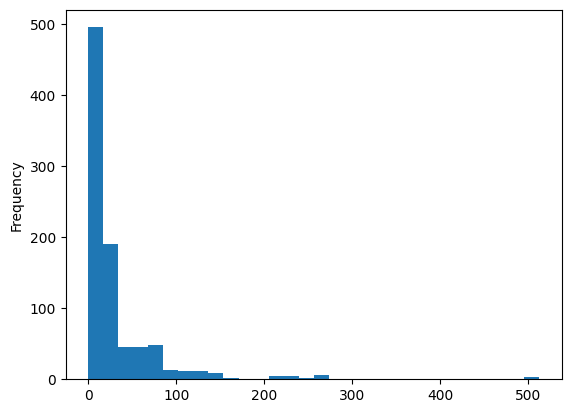

In [484]:
df['Fare'].plot.hist(bins=30)

컬럼 명 소문자로 변환

In [485]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [486]:
df.columns = [col.lower() for col in df.columns]
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

scikit-learn으로 데이터 분리

In [487]:
from sklearn.model_selection import train_test_split

In [488]:
SEED = 42

X_tr, X_te = train_test_split(df, random_state = SEED, test_size = 0.2)
X_tr = X_tr.reset_index(drop=True)
X_te = X_te.reset_index(drop=True)

X_tr.shape

(712, 12)

In [489]:
X_tr.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,332,0,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S
1,734,0,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S
2,383,0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S
3,705,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S
4,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S


In [490]:
X_tr.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,712.000000,712.000000,712.000000,572.000000,712.000000,712.000000,712.000000
mean,448.234551,0.376404,2.330056,29.498846,0.553371,0.379213,32.586276
std,256.731423,0.484824,0.824584,14.500059,1.176404,0.791669,51.969529
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.750000,0.000000,2.000000,21.000000,0.000000,0.000000,7.925000
50%,453.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,673.500000,1.000000,3.000000,38.000000,1.000000,0.000000,30.500000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [491]:
X_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  712 non-null    int64  
 1   survived     712 non-null    int64  
 2   pclass       712 non-null    int64  
 3   name         712 non-null    object 
 4   sex          712 non-null    object 
 5   age          572 non-null    float64
 6   sibsp        712 non-null    int64  
 7   parch        712 non-null    int64  
 8   ticket       712 non-null    object 
 9   fare         712 non-null    float64
 10  cabin        159 non-null    object 
 11  embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.9+ KB


null 값 처리하기

In [492]:
(X_tr.isnull().sum() / X_tr.shape[0]).round(4).sort_values(ascending=False)

cabin          0.7767
age            0.1966
embarked       0.0028
passengerid    0.0000
survived       0.0000
pclass         0.0000
name           0.0000
sex            0.0000
sibsp          0.0000
parch          0.0000
ticket         0.0000
fare           0.0000
dtype: float64

In [493]:
X_tr['cabin']

0         C124
1          NaN
2          NaN
3          NaN
4          NaN
        ...   
707        NaN
708        NaN
709        NaN
710    B96 B98
711        D26
Name: cabin, Length: 712, dtype: object

In [494]:
# cabin 데이터 drop
X_tr.drop('cabin', axis=1, inplace=True)
X_te.drop('cabin', axis=1, inplace=True)

In [495]:
X_tr.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,332,0,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,S
1,734,0,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,S
2,383,0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,S
3,705,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,S
4,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,S


In [496]:
X_tr.shape

(712, 11)

In [497]:
X_tr['age'] = X_tr['age'].fillna(X_tr['age'].median())
X_te['age'] = X_te['age'].fillna(X_tr['age'].median())

In [498]:
X_tr['age'].isnull().sum()

0

In [499]:
embarked_mode = X_tr['embarked'].mode().values[0]

In [500]:
X_tr['embarked'] = X_tr['embarked'].fillna(embarked_mode)
X_te['embarked'] = X_te['embarked'].fillna(embarked_mode)

In [501]:
X_tr.isnull().sum()

passengerid    0
survived       0
pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
embarked       0
dtype: int64

왜도, 첨도 확인

In [502]:
X_tr.skew()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_16088\2440454325.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_tr.skew()


passengerid   -0.027340
survived       0.511293
pclass        -0.677419
age            0.435812
sibsp          3.619385
parch          2.695459
fare           4.875066
dtype: float64

In [503]:
X_tr.kurt()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_16088\468212465.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_tr.kurt()


passengerid    -1.205375
survived       -1.743484
pclass         -1.196197
age             0.940380
sibsp          16.505734
parch           9.663403
fare           33.679535
dtype: float64

In [504]:
X_tr['fare'] = X_tr['fare'].map(lambda x : np.log(x) if x > 0 else 0)
X_tr.skew()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_16088\4022536558.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_tr.skew()


passengerid   -0.027340
survived       0.511293
pclass        -0.677419
age            0.435812
sibsp          3.619385
parch          2.695459
fare           0.455138
dtype: float64

In [505]:
X_tr.kurt()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_16088\468212465.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_tr.kurt()


passengerid    -1.205375
survived       -1.743484
pclass         -1.196197
age             0.940380
sibsp          16.505734
parch           9.663403
fare            0.728253
dtype: float64

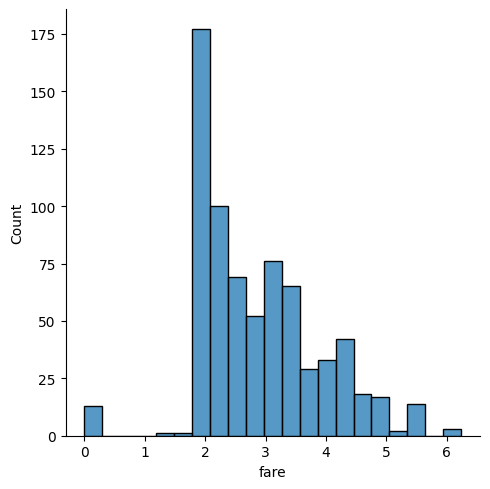

In [506]:
sns.displot(X_tr['fare'])

숫자형 데이터 타입 변환

In [507]:
X_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  712 non-null    int64  
 1   survived     712 non-null    int64  
 2   pclass       712 non-null    int64  
 3   name         712 non-null    object 
 4   sex          712 non-null    object 
 5   age          712 non-null    float64
 6   sibsp        712 non-null    int64  
 7   parch        712 non-null    int64  
 8   ticket       712 non-null    object 
 9   fare         712 non-null    float64
 10  embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 61.3+ KB


In [508]:
df_numbers = X_tr.select_dtypes(include=np.number)
df_numbers

,passengerid,survived,pclass,age,sibsp,parch,fare
0,332,0,1,45.5,0,0,3.349904
1,734,0,2,23.0,0,0,2.564949
2,383,0,3,32.0,0,0,2.070022
3,705,0,3,26.0,1,0,2.061048
4,814,0,3,6.0,4,2,3.442819
...,...,...,...,...,...,...,...
707,107,1,3,21.0,0,0,2.034706
708,271,0,1,28.0,0,0,3.433987
709,861,0,3,41.0,2,0,2.646763
710,436,1,1,14.0,1,2,4.787492


In [509]:
df_numbers.shape, df_numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  712 non-null    int64  
 1   survived     712 non-null    int64  
 2   pclass       712 non-null    int64  
 3   age          712 non-null    float64
 4   sibsp        712 non-null    int64  
 5   parch        712 non-null    int64  
 6   fare         712 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 39.1 KB


((712, 7), None)

In [510]:
X_tr['pclass'].unique()

array([1, 2, 3], dtype=int64)

In [511]:
X_tr['pclass'] = X_tr['pclass'].astype('category')
X_te['pclass'] = X_te['pclass'].astype('category')

In [512]:
X_tr['sibsp'].unique()

array([0, 1, 4, 3, 2, 8, 5], dtype=int64)

In [513]:
X_tr['sibsp'] = X_tr['sibsp'].astype('category')
X_te['sibsp'] = X_te['sibsp'].astype('category')

In [514]:
X_tr['parch'].unique()

array([0, 2, 1, 6, 4, 3, 5], dtype=int64)

In [515]:
X_tr['parch'] = X_tr['parch'].astype('category')
X_te['parch'] = X_te['parch'].astype('category')

In [516]:
X_tr['age'] = X_tr['age'].astype('int32')
X_te['age'] = X_te['age'].astype('int32')

In [517]:
X_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   passengerid  712 non-null    int64   
 1   survived     712 non-null    int64   
 2   pclass       712 non-null    category
 3   name         712 non-null    object  
 4   sex          712 non-null    object  
 5   age          712 non-null    int32   
 6   sibsp        712 non-null    category
 7   parch        712 non-null    category
 8   ticket       712 non-null    object  
 9   fare         712 non-null    float64 
 10  embarked     712 non-null    object  
dtypes: category(3), float64(1), int32(1), int64(2), object(4)
memory usage: 44.8+ KB


object 데이터 타입 변환

In [518]:
df_object = X_tr.select_dtypes(include='object')
df_object.head()

,name,sex,ticket,embarked
0,"Partner, Mr. Austen",male,113043,S
1,"Berriman, Mr. William John",male,28425,S
2,"Tikkanen, Mr. Juho",male,STON/O 2. 3101293,S
3,"Hansen, Mr. Henrik Juul",male,350025,S
4,"Andersson, Miss. Ebba Iris Alfrida",female,347082,S


In [519]:
df_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      712 non-null    object
 1   sex       712 non-null    object
 2   ticket    712 non-null    object
 3   embarked  712 non-null    object
dtypes: object(4)
memory usage: 22.4+ KB


In [520]:
X_tr['sex'] = X_tr['sex'].astype('category')
X_te['sex'] = X_te['sex'].astype('category')

In [521]:
X_tr['embarked'] = X_tr['embarked'].astype('category')
X_te['embarked'] = X_te['embarked'].astype('category')

In [522]:
X_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   passengerid  712 non-null    int64   
 1   survived     712 non-null    int64   
 2   pclass       712 non-null    category
 3   name         712 non-null    object  
 4   sex          712 non-null    category
 5   age          712 non-null    int32   
 6   sibsp        712 non-null    category
 7   parch        712 non-null    category
 8   ticket       712 non-null    object  
 9   fare         712 non-null    float64 
 10  embarked     712 non-null    category
dtypes: category(5), float64(1), int32(1), int64(2), object(2)
memory usage: 35.3+ KB


문자열 공백 제거

In [523]:
X_tr.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,332,0,1,"Partner, Mr. Austen",male,45,0,0,113043,3.349904,S
1,734,0,2,"Berriman, Mr. William John",male,23,0,0,28425,2.564949,S
2,383,0,3,"Tikkanen, Mr. Juho",male,32,0,0,STON/O 2. 3101293,2.070022,S
3,705,0,3,"Hansen, Mr. Henrik Juul",male,26,1,0,350025,2.061048,S
4,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6,4,2,347082,3.442819,S


In [524]:
X_tr['name'] = X_tr['name'].map(lambda x : x.strip())
X_te['name'] = X_te['name'].map(lambda x : x.strip())

성과 이름 분리

In [525]:
X_tr['last_name'] = X_tr['name'].map(lambda x : x.split(",")[0])
X_te['last_name'] = X_te['name'].map(lambda x : x.split(",")[0])

X_tr.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,last_name
0,332,0,1,"Partner, Mr. Austen",male,45,0,0,113043,3.349904,S,Partner
1,734,0,2,"Berriman, Mr. William John",male,23,0,0,28425,2.564949,S,Berriman
2,383,0,3,"Tikkanen, Mr. Juho",male,32,0,0,STON/O 2. 3101293,2.070022,S,Tikkanen
3,705,0,3,"Hansen, Mr. Henrik Juul",male,26,1,0,350025,2.061048,S,Hansen
4,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6,4,2,347082,3.442819,S,Andersson


In [526]:
X_tr['first_name'] = X_tr['name'].map(lambda x : x.split(",")[0])
X_te['first_name'] = X_te['name'].map(lambda x : x.split(",")[0])

X_tr.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,last_name,first_name
0,332,0,1,"Partner, Mr. Austen",male,45,0,0,113043,3.349904,S,Partner,Partner
1,734,0,2,"Berriman, Mr. William John",male,23,0,0,28425,2.564949,S,Berriman,Berriman
2,383,0,3,"Tikkanen, Mr. Juho",male,32,0,0,STON/O 2. 3101293,2.070022,S,Tikkanen,Tikkanen
3,705,0,3,"Hansen, Mr. Henrik Juul",male,26,1,0,350025,2.061048,S,Hansen,Hansen
4,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6,4,2,347082,3.442819,S,Andersson,Andersson


티켓에서 마지막 부분 숫자 분리

In [527]:
X_tr['ticket_num'] = X_tr['ticket'].map(lambda x : x.split(" ")[-1])
X_te['ticket_num'] = X_te['ticket'].map(lambda x : x.split(" ")[-1])

X_tr.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,last_name,first_name,ticket_num
0,332,0,1,"Partner, Mr. Austen",male,45,0,0,113043,3.349904,S,Partner,Partner,113043
1,734,0,2,"Berriman, Mr. William John",male,23,0,0,28425,2.564949,S,Berriman,Berriman,28425
2,383,0,3,"Tikkanen, Mr. Juho",male,32,0,0,STON/O 2. 3101293,2.070022,S,Tikkanen,Tikkanen,3101293
3,705,0,3,"Hansen, Mr. Henrik Juul",male,26,1,0,350025,2.061048,S,Hansen,Hansen,350025
4,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6,4,2,347082,3.442819,S,Andersson,Andersson,347082


문자열 포함 여부로 지칭 반환하기

In [528]:
dict_designation = {
    'Mr.': '남성',
    'Master.': '남성',
    'Sir.': '남성',
    'Miss.': '미혼 여성',
    'Mrs.': '기혼 여성',
    'Ms.': '미혼/기혼 여성',
    'Lady.': '숙녀',
    'Mlle.': '아가씨',
    # 직업
    'Dr.': '의사',
    'Rev.': '목사',
    'Major.': '계급',
    'Don.': '교수',
    'Col.': '군인',
    'Capt.': '군인',
    # 귀족
    'Mme.': '영부인',
    'Countess.': '백작부인',
    'Jonkheer.': '귀족'
}

In [529]:
X_tr['name'].head()

0                   Partner, Mr. Austen
1            Berriman, Mr. William John
2                    Tikkanen, Mr. Juho
3               Hansen, Mr. Henrik Juul
4    Andersson, Miss. Ebba Iris Alfrida
Name: name, dtype: object

In [530]:
dict_designation.keys()

dict_keys(['Mr.', 'Master.', 'Sir.', 'Miss.', 'Mrs.', 'Ms.', 'Lady.', 'Mlle.', 'Dr.', 'Rev.', 'Major.', 'Don.', 'Col.', 'Capt.', 'Mme.', 'Countess.', 'Jonkheer.'])

In [531]:
def designation_change(name) :
    designation = 'unknown'
    for k in dict_designation.keys() :
        if k in name :
            designation = k
            break
        else :
            designation = 'unknown'
    return designation

In [532]:
X_tr['designation'] = X_tr['name'].map(lambda x : designation_change(x))
X_te['designation'] = X_te['name'].map(lambda x : designation_change(x))

X_tr.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,last_name,first_name,ticket_num,designation
0,332,0,1,"Partner, Mr. Austen",male,45,0,0,113043,3.349904,S,Partner,Partner,113043,Mr.
1,734,0,2,"Berriman, Mr. William John",male,23,0,0,28425,2.564949,S,Berriman,Berriman,28425,Mr.
2,383,0,3,"Tikkanen, Mr. Juho",male,32,0,0,STON/O 2. 3101293,2.070022,S,Tikkanen,Tikkanen,3101293,Mr.
3,705,0,3,"Hansen, Mr. Henrik Juul",male,26,1,0,350025,2.061048,S,Hansen,Hansen,350025,Mr.
4,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6,4,2,347082,3.442819,S,Andersson,Andersson,347082,Miss.


In [533]:
cond = X_tr['designation'] == 'unknown'

X_tr.loc[cond] 

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,last_name,first_name,ticket_num,designation


In [534]:
X_tr.shape

(712, 15)

통계적 계산

In [535]:
X_tr.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked', 'last_name', 'first_name',
       'ticket_num', 'designation'],
      dtype='object')

In [536]:
X_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   passengerid  712 non-null    int64   
 1   survived     712 non-null    int64   
 2   pclass       712 non-null    category
 3   name         712 non-null    object  
 4   sex          712 non-null    category
 5   age          712 non-null    int32   
 6   sibsp        712 non-null    category
 7   parch        712 non-null    category
 8   ticket       712 non-null    object  
 9   fare         712 non-null    float64 
 10  embarked     712 non-null    category
 11  last_name    712 non-null    object  
 12  first_name   712 non-null    object  
 13  ticket_num   712 non-null    object  
 14  designation  712 non-null    object  
dtypes: category(5), float64(1), int32(1), int64(2), object(6)
memory usage: 57.5+ KB


In [537]:
X_tr['designation'].unique()

array(['Mr.', 'Miss.', 'Major.', 'Mrs.', 'Master.', 'Rev.', 'Dr.', 'Col.',
       'Mlle.', 'Capt.', 'Mme.', 'Ms.', 'Countess.', 'Lady.'],
      dtype=object)

In [538]:
X_tr['designation'] = X_tr['designation'].astype('category')
X_te['designation'] = X_te['designation'].astype('category')

In [539]:
X_tr['age'].dtype

dtype('int32')

In [540]:
X_tr.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,last_name,first_name,ticket_num,designation
0,332,0,1,"Partner, Mr. Austen",male,45,0,0,113043,3.349904,S,Partner,Partner,113043,Mr.
1,734,0,2,"Berriman, Mr. William John",male,23,0,0,28425,2.564949,S,Berriman,Berriman,28425,Mr.
2,383,0,3,"Tikkanen, Mr. Juho",male,32,0,0,STON/O 2. 3101293,2.070022,S,Tikkanen,Tikkanen,3101293,Mr.
3,705,0,3,"Hansen, Mr. Henrik Juul",male,26,1,0,350025,2.061048,S,Hansen,Hansen,350025,Mr.
4,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6,4,2,347082,3.442819,S,Andersson,Andersson,347082,Miss.


In [541]:
from pandas.api.types import is_numeric_dtype

In [542]:
for col in X_tr.columns :
    if is_numeric_dtype(X_tr[col]) == True :
        aggs = ['mean', 'max', 'min', 'median']
        for agg in aggs :
            X_tr[f'{col}_{agg}'] = X_tr[col].agg(agg)
            X_te[f'{col}_{agg}'] = X_te[col].agg(agg)
    else :
        aggs = ['mode', 'nunique']
        for agg in aggs :
            if aggs == 'mode' :
                X_tr[f'{col}_{agg}'] = X_tr[col].agg(agg).values[0]
                X_te[f'{col}_{agg}'] = X_te[col].agg(agg).values[0]
            else :
                X_tr[f'{col}_{agg}'] = X_tr[col].agg(agg)
                X_te[f'{col}_{agg}'] = X_te[col].agg(agg)

In [543]:
X_tr['embarked'].agg('mode').values[0]

'S'

In [544]:
X_tr['embarked'].agg('nunique')

3

In [545]:
X_tr.shape

(712, 53)

상관관계 파악

<AxesSubplot: >

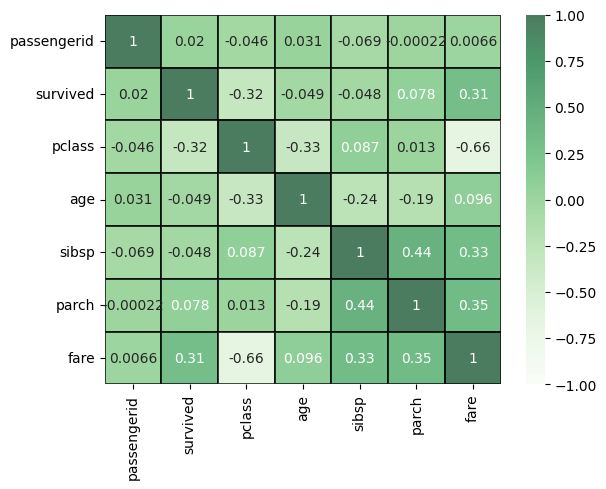

In [546]:
sns.heatmap(df_numbers.corr(), vmax=1, vmin=-1, annot=True, cbar=True, cmap='Greens', alpha=0.7, linewidths=0.2, linecolor='black')

In [547]:
df_numbers.corr()

,passengerid,survived,pclass,age,sibsp,parch,fare
passengerid,1.000000,0.019979,-0.046175,0.030614,-0.069226,-0.000217,0.006618
survived,0.019979,1.000000,-0.321750,-0.048588,-0.047602,0.078311,0.310655
pclass,-0.046175,-0.321750,1.000000,-0.329710,0.086933,0.012679,-0.662522
age,0.030614,-0.048588,-0.329710,1.000000,-0.237681,-0.189412,0.095907
sibsp,-0.069226,-0.047602,0.086933,-0.237681,1.000000,0.440355,0.328514
parch,-0.000217,0.078311,0.012679,-0.189412,0.440355,1.000000,0.347675
fare,0.006618,0.310655,-0.662522,0.095907,0.328514,0.347675,1.000000


pivot table 생성

In [548]:
df_pivot1 = pd.pivot_table(X_tr, index='pclass', values='age', aggfunc='mean').reset_index()
df_pivot1 = df_pivot1.rename(columns={'age' : 'age_mean_by_pclass'})
df_pivot1

,pclass,age_mean_by_pclass
0,1,36.668712
1,2,29.701987
2,3,25.929648


In [549]:
df_pivot2 = pd.pivot_table(X_tr, index='age', values='fare', aggfunc='mean').reset_index()
df_pivot2= df_pivot2.rename(columns={'fare' : 'fare_mean_by_age'})
df_pivot2

,age,fare_mean_by_age
0,0,3.114029
1,1,3.284854
2,2,3.326566
3,3,3.196284
4,4,3.264635
...,...,...
64,64,5.572154
65,65,3.279030
66,70,2.887249
67,74,2.050913


pivot table merge

In [550]:
pd.merge(X_tr, df_pivot1, how='left', on='pclass')
pd.merge(X_tr, df_pivot2, how='left', on='age')

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,...,embarked_nunique,last_name_mode,last_name_nunique,first_name_mode,first_name_nunique,ticket_num_mode,ticket_num_nunique,designation_mode,designation_nunique,fare_mean_by_age
0,332,0,1,"Partner, Mr. Austen",male,45,0,0,113043,3.349904,...,3,Andersson,552,Andersson,552,2343,557,Mr.,14,3.181145
1,734,0,2,"Berriman, Mr. William John",male,23,0,0,28425,2.564949,...,3,NaN,552,NaN,552,NaN,557,NaN,14,2.948989
2,383,0,3,"Tikkanen, Mr. Juho",male,32,0,0,STON/O 2. 3101293,2.070022,...,3,NaN,552,NaN,552,NaN,557,NaN,14,2.760743
3,705,0,3,"Hansen, Mr. Henrik Juul",male,26,1,0,350025,2.061048,...,3,NaN,552,NaN,552,NaN,557,NaN,14,2.431884
4,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6,4,2,347082,3.442819,...,3,NaN,552,NaN,552,NaN,557,NaN,14,2.983273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21,0,0,343120,2.034706,...,3,NaN,552,NaN,552,NaN,557,NaN,14,2.648984
708,271,0,1,"Cairns, Mr. Alexander",male,28,0,0,113798,3.433987,...,3,NaN,552,NaN,552,NaN,557,NaN,14,2.540758
709,861,0,3,"Hansen, Mr. Claus Peter",male,41,2,0,350026,2.646763,...,3,NaN,552,NaN,552,NaN,557,NaN,14,3.232678
710,436,1,1,"Carter, Miss. Lucile Polk",female,14,1,2,113760,4.787492,...,3,NaN,552,NaN,552,NaN,557,NaN,14,3.408689


의미없는 null값 drop

In [551]:
X_tr.shape

(712, 53)

In [552]:
X_tr.isnull().sum().sort_values(ascending=False)

last_name_mode         711
pclass_mode            711
parch_mode             711
sex_mode               711
sibsp_mode             711
embarked_mode          711
ticket_mode            711
first_name_mode        711
ticket_num_mode        711
designation_mode       711
parch_nunique            0
age_min                  0
age_max                  0
age_median               0
age_mean                 0
sibsp_nunique            0
passengerid              0
fare_max                 0
ticket_nunique           0
fare_mean                0
fare_min                 0
fare_median              0
embarked_nunique         0
last_name_nunique        0
first_name_nunique       0
ticket_num_nunique       0
sex_nunique              0
name_nunique             0
survived                 0
first_name               0
pclass                   0
name                     0
sex                      0
age                      0
sibsp                    0
parch                    0
ticket                   0
f

In [554]:
X_tr.dropna(axis=1)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,...,ticket_nunique,fare_mean,fare_max,fare_min,fare_median,embarked_nunique,last_name_nunique,first_name_nunique,ticket_num_nunique,designation_nunique
0,332,0,1,"Partner, Mr. Austen",male,45,0,0,113043,3.349904,...,558,2.88705,6.238967,0.0,2.670985,3,552,552,557,14
1,734,0,2,"Berriman, Mr. William John",male,23,0,0,28425,2.564949,...,558,2.88705,6.238967,0.0,2.670985,3,552,552,557,14
2,383,0,3,"Tikkanen, Mr. Juho",male,32,0,0,STON/O 2. 3101293,2.070022,...,558,2.88705,6.238967,0.0,2.670985,3,552,552,557,14
3,705,0,3,"Hansen, Mr. Henrik Juul",male,26,1,0,350025,2.061048,...,558,2.88705,6.238967,0.0,2.670985,3,552,552,557,14
4,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6,4,2,347082,3.442819,...,558,2.88705,6.238967,0.0,2.670985,3,552,552,557,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21,0,0,343120,2.034706,...,558,2.88705,6.238967,0.0,2.670985,3,552,552,557,14
708,271,0,1,"Cairns, Mr. Alexander",male,28,0,0,113798,3.433987,...,558,2.88705,6.238967,0.0,2.670985,3,552,552,557,14
709,861,0,3,"Hansen, Mr. Claus Peter",male,41,2,0,350026,2.646763,...,558,2.88705,6.238967,0.0,2.670985,3,552,552,557,14
710,436,1,1,"Carter, Miss. Lucile Polk",female,14,1,2,113760,4.787492,...,558,2.88705,6.238967,0.0,2.670985,3,552,552,557,14
